<a href="https://colab.research.google.com/github/dkhuy6128/Car-Price-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
cars = pd.read_csv('gdrive/My Drive/car data.csv')
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cars.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
print(cars['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
print(cars['Seller_Type'].value_counts())
print(cars['Transmission'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
fuel_type = cars['Fuel_Type']
seller_type = cars['Seller_Type']
transmission = cars['Transmission']
selling_price = cars['Selling_Price']

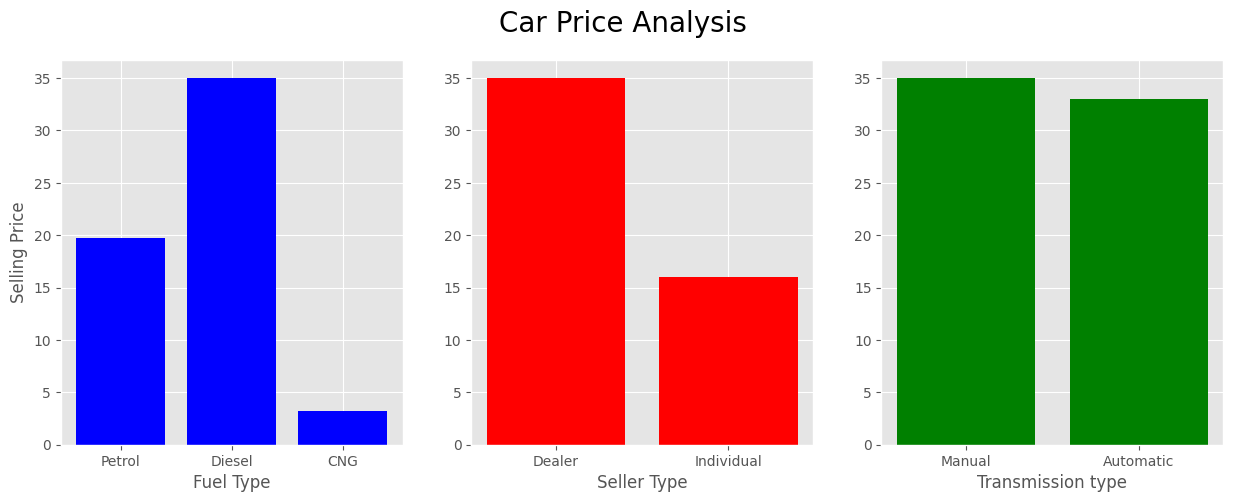

In [ ]:
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Car Price Analysis', fontsize=20)
plt.subplot(1, 3, 1)
plt.bar(fuel_type, selling_price, color = 'blue')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.subplot(1, 3, 2)
plt.bar(seller_type, selling_price, color = 'red')
plt.xlabel('Seller Type')
plt.subplot(1, 3, 3)
plt.bar(transmission, selling_price, color = 'green')
plt.xlabel('Transmission type')
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

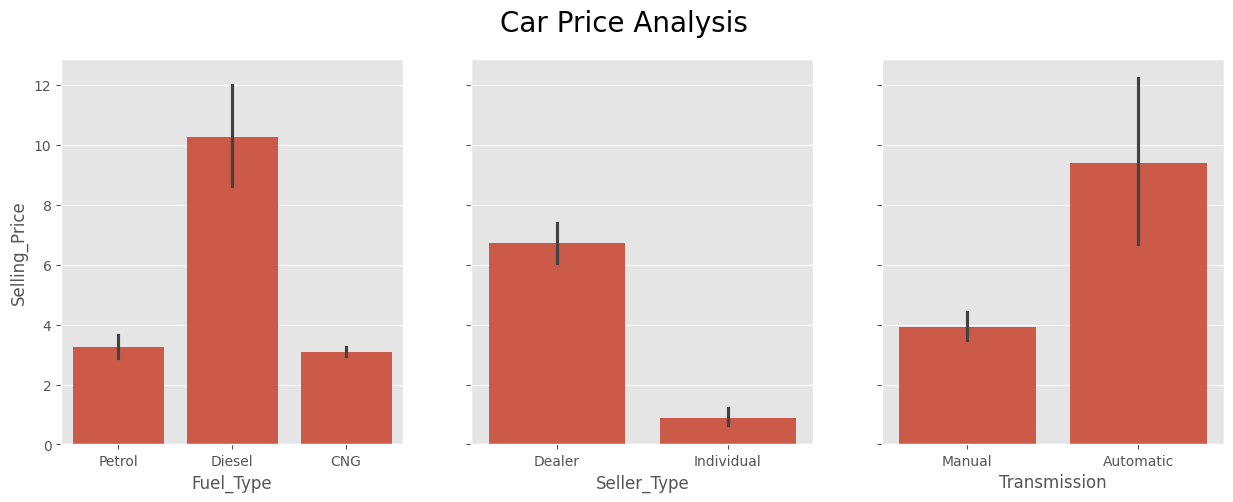

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
fig.suptitle('Car Price Analysis', fontsize = 20)
sns.barplot(x = fuel_type, y = selling_price, ax = axe[0])
sns.barplot(x = seller_type, y = selling_price, ax = axe[1])
sns.barplot(x = transmission, y = selling_price, ax = axe[2])

In [ ]:
petrol_data = cars.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [ ]:
seller_data = cars.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [ ]:
cars.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
cars = pd.get_dummies(cars, columns = ['Seller_Type', 'Transmission'], drop_first = True)

In [ ]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,False,True
1,sx4,2013,4.75,9.54,43000,1,0,False,True
2,ciaz,2017,7.25,9.85,6900,0,0,False,True
3,wagon r,2011,2.85,4.15,5200,0,0,False,True
4,swift,2014,4.60,6.87,42450,1,0,False,True


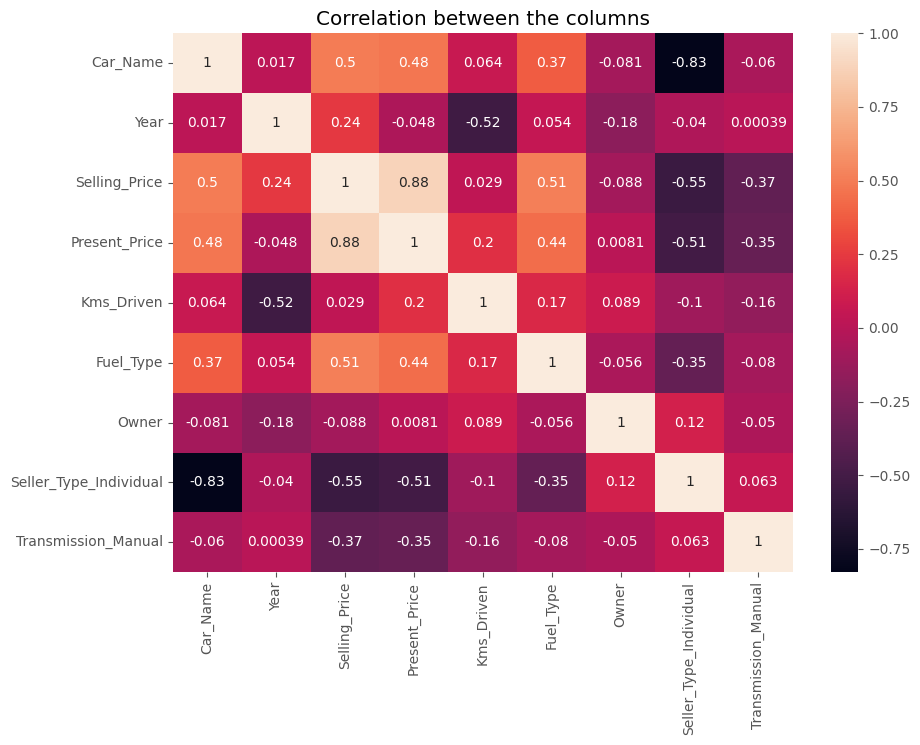

In [ ]:
cars['Car_Name'] = cars['Car_Name'].astype('category').cat.codes

plt.figure(figsize = (10, 7))
sns.heatmap(cars.corr(), annot = True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

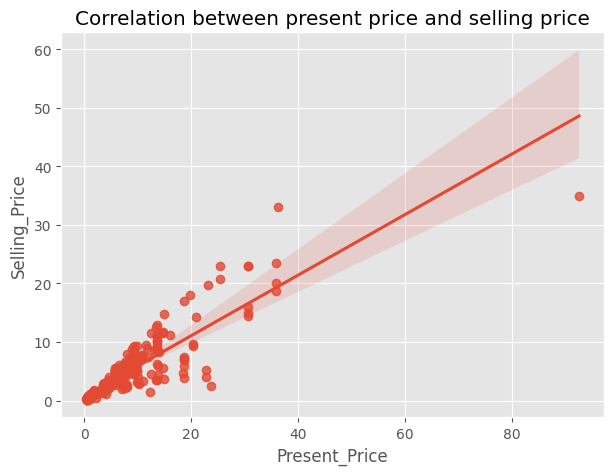

In [ ]:
fig = plt.figure(figsize = (7, 5))
plt.title('Correlation between present price and selling price')
sns.regplot(x = 'Present_Price', y = 'Selling_Price', data = cars)

In [ ]:
X = cars.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = cars['Selling_Price']

In [ ]:
# Mô hình LinearRegression
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# 20% test, 80% train

# Chuẩn hoá dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
pred = model.predict(X_test)

Shape of X:  (301, 7)
Shape of y:  (301,)


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (240, 7)
Shape of X_test:  (61, 7)
Shape of y_train:  (240,)
Shape of y_test:  (61,)


In [ ]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Khởi tạo mô hình SVM với pipeline
svm_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Đánh giá mô hình LinearRegression
# Sử dụng các chỉ số như R2 Score, MEA, và MSE để đánh giá hiệu suất mô hình:
from sklearn import metrics
print("R2 Score: ", metrics.r2_score(pred, y_test))
print("MEA: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))

R2 Score:  0.7881496929420146
MEA:  1.2217615462332727
MSE:  3.528927253890652


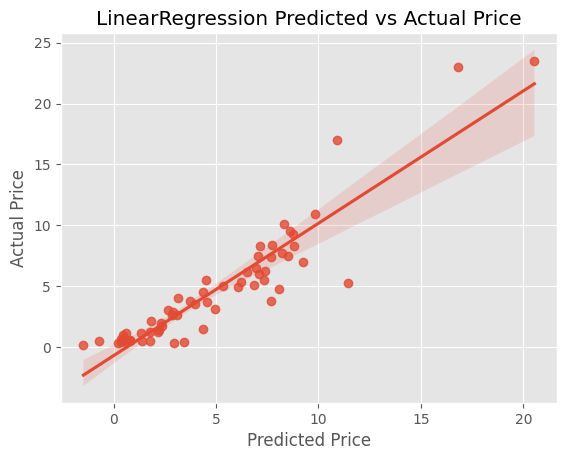

In [ ]:
sns.regplot(x = pred, y = y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Predicted vs Actual Price')
plt.show()

In [ ]:
# Đánh giá mô hình Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 0.940174032023754


Text(0, 0.5, 'Predicted Values')

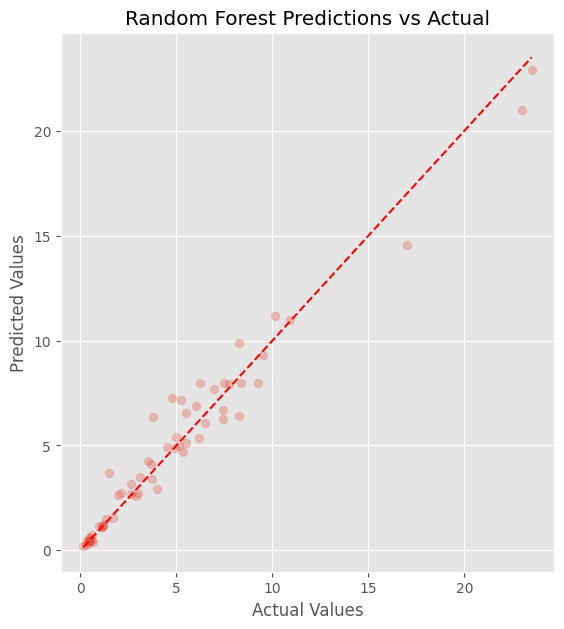

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Đánh giá mô hình SVM
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f'SVM RMSE: {svm_rmse}')

SVM RMSE: 2.2755050875231815


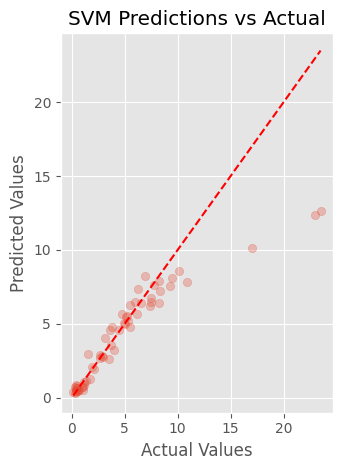

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, svm_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('SVM Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()